<a href="https://colab.research.google.com/github/realmistic/pysteps-basic-fin-analysis/blob/master/Part2_Finance_APIs_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) List of tickers

INTRO: sometimes it is hard to decide where to invest, there are some well-knows companies called 'blue chips' with a high market capitalisation
https://www.cmcmarkets.com/en-ie/trading-guides/blue-chip-stocks
A good indicator is to know if the company is listed to the trading index

But oftentimes, one can be interested in some sector, or say new companies that can promise more returns (and more risk).

Now during the covid it is interesting to follow some biotech companies that may be close to the next big breakthrough.
https://www.proclinical.com/blogs/2019-3/the-top-10-pharmaceutical-companies-in-the-world-2019

For example, phama:
 - MERCK (NYSE: MRK)
 - NOVARTIS (NYSE: NVS)
 - J&J (NYSE: JNJ)
 - AbbVie Inc. (NYSE: ABBV)
 - Amgen Inc. ( NASDAQ: AMGN)
 - Bristol-Myers Squibb Co (NYSE: BMY)

https://www.forbes.com/sites/greatspeculations/2020/05/19/mercks-stock-headed-to-100/

In [ ]:
# https://pypi.org/project/get-all-tickers/
# https://libraries.io/pypi/get-all-tickers
  # Last release May 24,2020 -- quite fresh
    # Basically if you check its code - the library is a wrapper to the API provided by NASDAQ marketplace.
    # https://old.nasdaq.com/screening/companies-by-name.aspx?letter=0&exchange=nyse&render=download
    # "Old" says that is can probably become not supported at some time, but direct call to the stock exchange is good - > the data should be fresh
!pip install get-all-tickers

  Created wheel for get-all-tickers: filename=get_all_tickers-1.6-cp36-none-any.whl size=3712 sha256=d246b9294976ff5b6aa7e22ca5f54c11d9817b4fc05fe59427cbcb69684ea763
  Stored in directory: /root/.cache/pip/wheels/0d/b6/8e/ecb6665d57f96cee7a7c154a7e3eab3fb13a4f3facf3cb025d
Successfully built get-all-tickers


In [ ]:
# if you specify less params as true - it is less requests to download all stocks
  # (IVAN) Sometimes it is not working or working for too long: I don't know how to fix it. Probably some file servers are down
from get_all_tickers import get_tickers as gt
list_of_tickers = gt.get_tickers(NYSE=True, NASDAQ=True, AMEX=False)

In [ ]:
len(list_of_tickers)

In [ ]:
type(list_of_tickers)

In [ ]:
# Try to find a 'blue-chip' companies, like Tesla (NASDAQ: TSLA) - one of the most traded stock in 2020
# https://markets.businessinsider.com/news/stocks/tesla-stock-most-shorted-us-beats-apple-highest-short-interest-2020-1-1028823046#
list_of_tickers.index('TSLA')

In [ ]:
# Recent IPOs: can we find them?
#  E.g. we read this article for tech ipos mispriced (read: they promise now very high returns)
  # Agora Inc (NASDAQ: API), 
  # Lemonade Inc (NYSE: LMND)
# https://www.cnbc.com/2020/07/02/tech-ipos-getting-mispriced-as-lemonade-and-agora-double-in-debuts.html
list_of_tickers.index('API')
list_of_tickers.index('LMND')

In [ ]:
# Find one pharma company:
list_of_tickers.index('MRK')

# 2) Yahoo Finance API
 - https://towardsdatascience.com/free-stock-data-for-python-using-yahoo-finance-api-9dafd96cad2e
 - 2000 requests per IP per hour ==> 48k requests per day


In [ ]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=e99b82116d5e4c8059b56e19b8cb5e1c72cd4b1259218cbd2daa25072d666773
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:
import yfinance as yf

In [ ]:
tickers = ['TSLA', 'API', 'LMND','MRK', 'GOOG']

Some info:
 - TSLA - the most impressive growth. Despite many investors "shored" the stock (betting on its decrease) - it showed an amazing growth in the recent months
 - API and LMND : newly released companies - quite volatile in the stock price: 10-20% just in matter of days
 - MRK - had a drop around 2020-03, now restored to the previous year levels. Many ups and downs for it

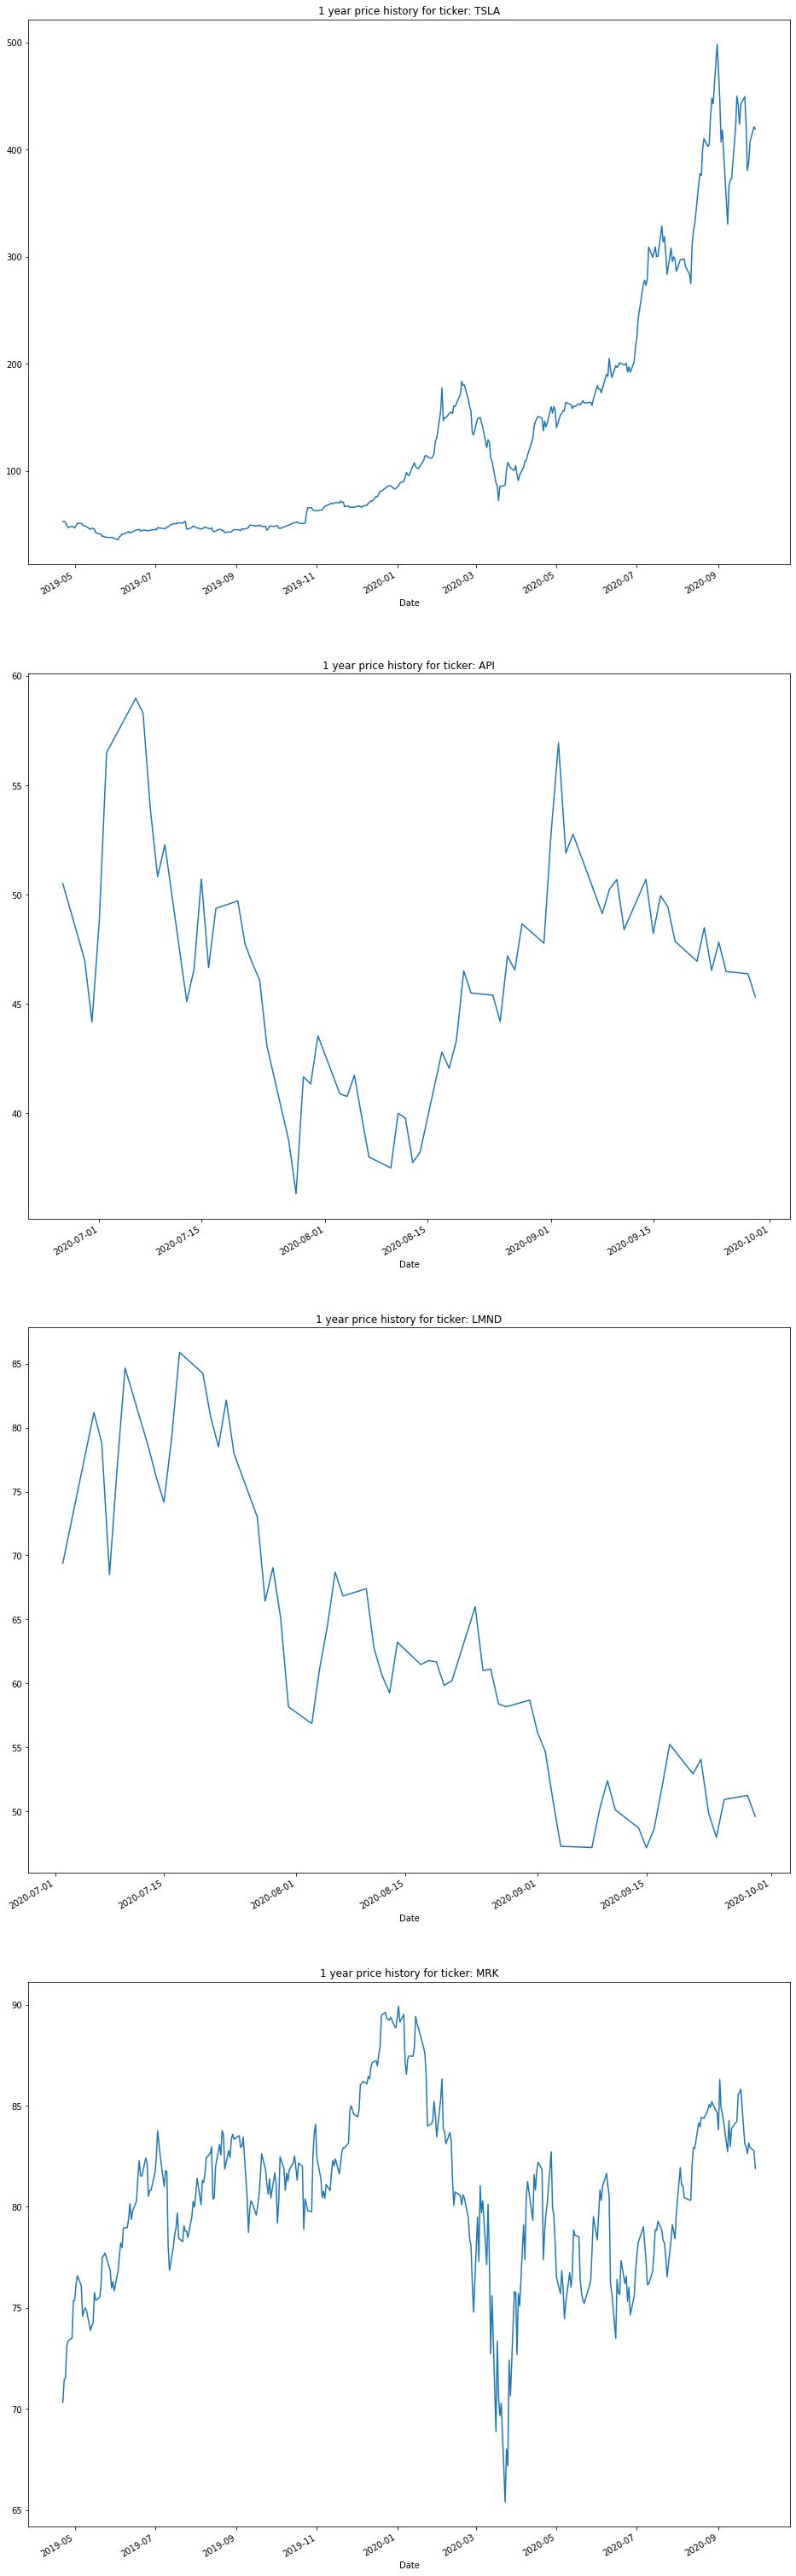

In [ ]:
import matplotlib.pyplot as plt

for i,ticker in enumerate(tickers):
  current_ticker = yf.Ticker(ticker)
  # ticker_stats.append(current_ticker)
  # https://matplotlib.org/3.2.1/gallery/subplots_axes_and_figures/subplot.html#sphx-glr-gallery-subplots-axes-and-figures-subplot-py
  plt.subplot(len(tickers),1,i+1)  
  current_ticker.history(period='365d')['Close'].plot(figsize=(16,60), title='1 year price history for ticker: '+ticker)

One interesting object : info about a ticker.
You can get, say, 52weeks stock change price in 1 call (no need to work with time series), and compare it with profit margins for the company
Let's try to do it for a few pharma companies.
!!DUE to some reasoon it doesn't exist for some of the companies

In [ ]:
ticker = tickers[0]
print(ticker)

TSLA


In [ ]:
yf_info = yf.Ticker(ticker).info

In [ ]:
yf_info

{'52WeekChange': 4.8699937,
 'SandP52WeekChange': 0.08030069,
 'address1': '3500 Deer Creek Road',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 1508,
 'askSize': 800,
 'averageDailyVolume10Day': 19633142,
 'averageVolume': 14461131,
 'averageVolume10days': 19633142,
 'beta': 1.196078,
 'beta3Year': None,
 'bid': 1506.9,
 'bidSize': 1100,
 'bookValue': 49.584,
 'category': None,
 'circulatingSupply': None,
 'city': 'Palo Alto',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'dateShortInterest': 1593475200,
 'dayHigh': 1537.51,
 'dayLow': 1490,
 'dividendRate': None,
 'dividendYield': None,
 'earningsQuarterlyGrowth': None,
 'enterpriseToEbitda': 94.57,
 'enterpriseToRevenue': 11.023,
 'enterpriseValue': 286831378432,
 'exDividendDate': None,
 'exchange': 'NMS',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'expireDate': None,
 'fiftyDayAverage': 1122.1711,
 'fiftyTwoWeekHig

In [ ]:
yf_info['52WeekChange']

4.8699937

In [ ]:
# 52WeekChange, shortPercentOfFloat, profitMargins

In [ ]:
# Let's compare there financials:
stock_52w_change=[]
profitsMargins=[]

#  TSLA - remove it as it is outlier
  # LMND ,'API'and MRK - can't find info, but it has! stock price
tickers=['NVS','JNJ','ABBV','AMGN']
for ticker in tickers:
  print(ticker)
  current_ticker = yf.Ticker(ticker)
  current_ticker_info = current_ticker.info
  stock_52w_change.append(current_ticker_info['52WeekChange'])
  profitsMargins.append(current_ticker_info['profitMargins'])

NVS
JNJ
ABBV
AMGN


In [ ]:
import pandas as pd


In [ ]:
df=pd.DataFrame([stock_52w_change,profitsMargins], columns=tickers, index={'52w change', 'profitMargins'})

In [ ]:
df

,NVS,JNJ,ABBV,AMGN
profitMargins,-0.06242,0.160992,0.482794,0.469441
52w change,0.24318,0.188630,0.247700,0.320250


Text(0.5, 1.0, 'Comparing profit margins and 52 weeks growth rates for pharma stocks')

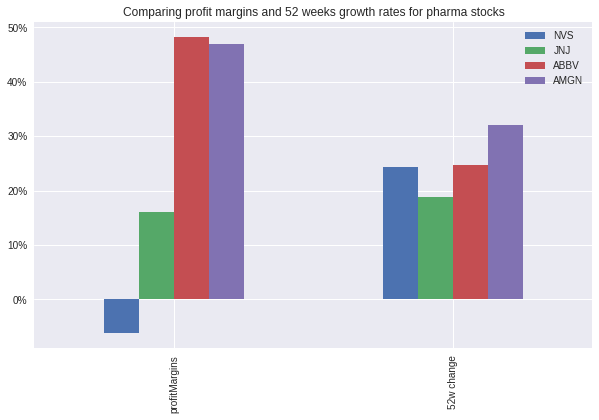

In [ ]:
# https://stackoverflow.com/questions/31357611/format-y-axis-as-percent/40257428
import matplotlib.ticker as mtick

ax = df.plot.bar(figsize=(10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.set_title('Comparing profit margins and 52 weeks growth rates for pharma stocks')



In [ ]:
# # https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars
# import matplotlib.pyplot as plt
# # from matplotlib.dates import date2num
# # import datetime

# x = tickers

# y = stock_52w_change
# z = [1, 2, 3]
# k = [11, 12, 13]

# ax = plt.subplot(111)
# ax.bar(x-0.2, y, width=0.2, color='b', align='center')
# ax.bar(x, z, width=0.2, color='g', align='center')
# ax.bar(x+0.2, k, width=0.2, color='r', align='center')
# ax.xaxis_date()

# plt.show()

# 3) Getting index data S&P500

In [ ]:
# Get index data S&P and DJI:

# https://pydata.github.io/pandas-datareader/remote_data.html#stooq-index-data
# FRED: Federal Reserve Economic Data // fred,stlouisfed.org
import pandas_datareader.data as pdr
# from datetime import datetime
from datetime import date
# plt.style.use('seaborn')
# import json
# import requests

end = date.today()
# start = datetime(2020,1,1)
start = datetime(year=end.year-1, month=end.month, day=end.day-2) 
# end = datetime(2020,6,29)
print(f'Period 1 year until today: {start} to {end} ')

Period 1 year until today: 2019-07-17 00:00:00 to 2020-07-19 


In [ ]:
# https://github.com/pydata/pandas-datareader -- check this github as a collection of many readers
# https://pydata.github.io/pandas-datareader/remote_data.html#stooq-index-data
# https://stooq.com/t/. -- all indexes list
dji_index = pdr.get_data_stooq('^DJI',start,end)
# SPX= S&P500
spx_index = pdr.get_data_stooq('^SPX', start, end) 

Very often the stock performance and 'health check' is compared to the index value which is a composite aggregated average performance over the set of stocks.
The most well-known index is probably  S&P500

As you can see: it was around 3000 1 year ago, then is was a drop to 2200 in March, now it is a moderate increase to 3200.
But still the last 3 months it is a 'bullish' market - constantly growing prices of a stock index and many individual stocks.

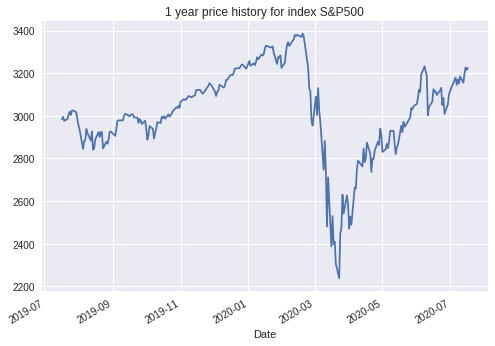

In [ ]:
spx_index['Close'].plot(title='1 year price history for index S&P500')

In [ ]:
spx_index['Close'].head(10)

Date
2020-07-17    3224.73
2020-07-16    3215.57
2020-07-15    3226.56
2020-07-14    3197.52
2020-07-13    3155.22
2020-07-10    3185.04
2020-07-09    3152.05
2020-07-08    3169.94
2020-07-07    3145.32
2020-07-06    3179.72
Name: Close, dtype: float64

In [ ]:
spx_index['Close'].tail(10)

Date
2019-07-30    3013.18
2019-07-29    3020.97
2019-07-26    3025.86
2019-07-25    3003.67
2019-07-24    3019.56
2019-07-23    3005.47
2019-07-22    2985.03
2019-07-19    2976.61
2019-07-18    2995.11
2019-07-17    2984.42
Name: Close, dtype: float64

In [ ]:
spx_index.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
spx_index.index

DatetimeIndex(['2020-07-17', '2020-07-16', '2020-07-15', '2020-07-14',
               '2020-07-13', '2020-07-10', '2020-07-09', '2020-07-08',
               '2020-07-07', '2020-07-06',
               ...
               '2019-07-30', '2019-07-29', '2019-07-26', '2019-07-25',
               '2019-07-24', '2019-07-23', '2019-07-22', '2019-07-19',
               '2019-07-18', '2019-07-17'],
              dtype='datetime64[ns]', name='Date', length=254, freq=None)

In [ ]:
spx_index['Close']['2020-07-17'].astype(float)

Date
2020-07-17    3224.73
Name: Close, dtype: float64

In [ ]:
spx_index['Close']['2019-07-17']

Date
2019-07-17    2984.42
Name: Close, dtype: float64

In [ ]:
spx_index['Close']['2020-07-17'].astype(float) / spx_index['Close']['2019-07-17'].astype(float)

Date
2019-07-17   NaN
2020-07-17   NaN
Name: Close, dtype: float64

# 4) QUANDL

One may want to look at the other classes of investment, say gold or bitcoin - just to compare vs. stocks performance

(Ivan's comment): I like it for many free datasets, and a good description of the data provided.
Like this for GOLD:
*Gold Price: London Fixings, London Bullion Market Association (LBMA). Fixing levels are set per troy ounce. The London Gold Fixing Companies set the prices for gold that are globally considered as the international standard for pricing of gold. The Gold price in London is set twice a day by five LBMA Market Makers who comprise the London Gold Market Fixing Limited (LGMFL). The process starts with the announcement from the Chairman of the LGMFL to the other members of the LBMA Market Makers, then relayed to the dealing rooms where customers can express their interest as buyers or sellers and also the quantity they wish to trade. The gold fixing price is then set by collating bids and offers until the supply and demand are matched. At this point the price is announced as the 'Fixed' price for gold and all business is conducted on the basis of that price.*


In [ ]:
!pip install quandl

In [ ]:
import quandl

In [ ]:
# https://www.quandl.com/data/LBMA/GOLD-Gold-Price-London-Fixing
london_fixing_gold_price = quandl.get("LBMA/GOLD",start_date=start, end_date=end, authtoken="5qE7KbLemDiZ9RfNsVuM")

In [ ]:
london_fixing_gold_price.columns

Index(['USD (AM)', 'USD (PM)', 'GBP (AM)', 'GBP (PM)', 'EURO (AM)',
       'EURO (PM)'],
      dtype='object')

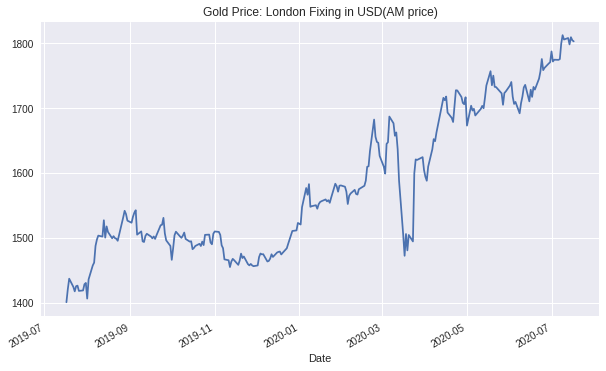

In [ ]:
london_fixing_gold_price['USD (AM)'].plot(figsize=(10,6), title="Gold Price: London Fixing in USD(AM price)"), plt.show();

In [ ]:
london_fixing_gold_price['USD (AM)'].head()

Date
2019-07-17    1400.80
2019-07-18    1420.90
2019-07-19    1437.05
2019-07-22    1424.45
2019-07-23    1417.55
Name: USD (AM), dtype: float64

In [ ]:
london_fixing_gold_price['USD (AM)'].tail()

Date
2020-07-13    1808.05
2020-07-14    1798.20
2020-07-15    1809.30
2020-07-16    1804.60
2020-07-17    1802.90
Name: USD (AM), dtype: float64

In [ ]:
london_fixing_gold_price['USD (AM)']['2020-07-17'] / london_fixing_gold_price['USD (AM)']['2019-07-17']

1.2870502569960023